In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Import & Read Data

In [2]:
dfTC = pd.read_csv(r'C://Users//austi//ConstructionTimeSeriesDatav2.csv')

find moving avg

In [5]:
def sqErr(row):
    return (row['PrivateConstruction'] - row['MovAvg'])**2

dfTC['MovAvg'] = np.NaN
dfTC['sqErr'] = np.NaN

dfTC.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = len(dfTC['PrivateConstruction']))

window = 36 
window = window - window % 2

for i in range (int(window/2),dfTC.shape[0]-int(window/2)):
    dfTC.loc[dfTC.index[i],'MovAvg'] = (0.5*dfTC.iloc[i - int(window/2)]['PrivateConstruction'] + dfTC.iloc[i - int(window/2)+1:i + int(window/2)]['PrivateConstruction'].sum() + .5*dfTC.iloc[i + int(window/2)]['PrivateConstruction'])/float(window)

dfTC['sqErr'] = (dfTC['PrivateConstruction'] - dfTC['MovAvg'])**2

dfTC.dropna(how='any',inplace=True)

C:\Users\austi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  import sys


In [6]:
dfTC['R1Private'] = dfTC['PrivateConstruction'] - dfTC['MovAvg']
dfTC['R1ErrorPrivate'] = abs((dfTC['PrivateConstruction'] - dfTC['R1Private'])/dfTC['PrivateConstruction'])
dfTC.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1Private': '{:,.1f}'.format,
    'R1ErrorPrivate': '{:,.3f}'.format
})

,Month,MonthYear,TotalConstruction,PrivateConstruction,PublicConstruction,MovAvg,sqErr,R1Private,R1ErrorPrivate
2003-07-31 00:00:00,19,3-Jul,82971,62216,20755,57969.4,"18,033,352.0","4,246.6",0.932
2003-08-31 00:00:00,20,3-Aug,85191,63234,21957,58314.9,"24,197,107.6","4,919.1",0.922
2003-09-30 00:00:00,21,3-Sep,83841,61767,22075,58718.9,"9,290,896.7","3,048.1",0.951
2003-10-31 00:00:00,22,3-Oct,83133,62813,20321,59143.6,"13,464,822.5","3,669.4",0.942
2003-11-30 00:00:00,23,3-Nov,77915,60115,17801,59593.5,"271,918.8",521.5,0.991
2003-12-31 00:00:00,24,3-Dec,71050,55584,15466,60111.7,"20,500,394.3","-4,527.7",1.081
2004-01-31 00:00:00,25,4-Jan,64934,50975,13959,60687.3,"94,329,418.8","-9,712.3",1.191
2004-02-29 00:00:00,26,4-Feb,64138,50449,13689,61335.4,"118,514,067.8","-10,886.4",1.216
2004-03-31 00:00:00,27,4-Mar,73238,57796,15443,62017.4,"17,820,241.4","-4,221.4",1.073
2004-04-30 00:00:00,28,4-Apr,78354,61177,17177,62701.1,"2,322,787.7","-1,524.1",1.025


In [8]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfTC['R1Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8250475036301713
Correlation, lag  2     0.4820939752221447
Correlation, lag  3     0.0661838628463355
Correlation, lag  4     -0.29310582259154694
Correlation, lag  5     -0.5386625150984725
Correlation, lag  6     -0.6496282831082484
Correlation, lag  7     -0.549838477475518
Correlation, lag  8     -0.3185413831731613
Correlation, lag  9     0.02011606382325631
Correlation, lag  10     0.41176952584284515
Correlation, lag  11     0.7322731003955263
Correlation, lag  12     0.8944851710984221
Correlation, lag  13     0.7299213692607464
Correlation, lag  14     0.4055214152186815
Correlation, lag  15     0.0031237974667481893
Correlation, lag  16     -0.34159925855108353
Correlation, lag  17     -0.5745510163732713
Correlation, lag  18     -0.681216824190257
Correlation, lag  19     -0.5902172854543253
Correlation, lag  20     -0.37531995989940625
Correlation, lag  21     -0.04750388422754723
Correlation, lag  22     0.3369494305895757
Correlation, lag  23   

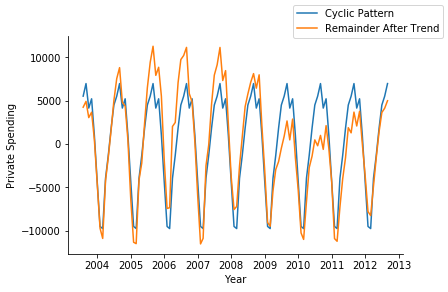

In [18]:
cycleLen = period   
avg = []            
numCycles = int(len(dfTC)/cycleLen + 0.5)
for j in range(cycleLen):
    if j + (numCycles-1) * cycleLen < len(dfTC):
        d = dfTC.iloc[range(j,j + (numCycles-1) * cycleLen+1,cycleLen)]['R1Private']
        avg.append(sum(d)/len(d))
    else:
        d = dfTC.iloc[range(j,j + (numCycles-2) * cycleLen+1,cycleLen)]['R1Private']
        avg.append(sum(d)/len(d))
dfTC['C'] = np.NaN
for i in range(len(dfTC)):
    dfTC.loc[dfTC.index[i], 'C'] = avg[i % cycleLen]
    
fig,ax = plt.subplots()
ax.plot(dfTC['C'],label='Cyclic Pattern')
ax.plot(dfTC['R1Private'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Private Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()